# 분류 성능 평가 지표 (Classfication Metrics)

다음 데이터를 갖고 분류 성능을 평가해보자.

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['malignant'] = 1 - breast_cancer.target # 0 for malignant and 1 for benign in the original dataset

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
data_train, data_test = train_test_split(data, test_size= 20)

In [14]:
lr = LogisticRegression()
lr.fit(data_train[['mean radius', 'mean texture']], data_train['malignant'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_true = data_test['malignant']
y_pred = lr.predict(data_test[['mean radius', 'mean texture']])

In [27]:
import numpy as np

In [28]:
np.stack([y_pred, y_true], axis=1)

array([[1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0]])

## 오분류표 (Confusion Matrix)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[11,  0],
       [ 4,  5]])

In [30]:
pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,11,0
Actual Positive,4,5


In [31]:
y_true_animal = ["cat", "dog", "dog", "cat", "rabbit", "rabbit"]
y_pred_animal = ["dog", "dog", "cat", "cat", "rabbit", "rabbit"]
confusion_matrix(y_true_animal, y_pred_animal, labels=["dog", "rabbit", "cat"])

array([[1, 0, 1],
       [0, 2, 0],
       [1, 0, 1]])

## 정확도 (Accuracy)

가장 일반적으로 쓰이는 지표. 직관적으로 이해하기 쉽다.

전체 중에 맞춘 것의 비율.

$$\text{accuracy} = \frac{TP + TN}{N}$$

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.80000000000000004

### 정확도의 문제점

원래 클래스 비율이 한 쪽으로 치우쳐져 있을 때는 제대로 평가하기 어렵다. 
* imbalanced dataset problem

In [35]:
dumb_y_pred = np.zeros(len(y_true))
accuracy_score(y_true, dumb_y_pred)

0.55000000000000004

### 정밀도 (Precision)
* 클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 데이터 수의 비율
* 맞다고 한 것 중 실제로 맞은 비율

$$\text{precision} = \frac{TP}{TP + FP} = \frac{TP}{Predicted\_Positives}$$

### 재현율 (Recall)
* 클래스에 실제로 속한 데이터 중에 클래스에 속한다고 예측한 비율
 
$$\text{recall} = \frac{TP}{TP + FN} = \frac{TP}{Actual\_Positives} $$

### Fall-Out
* FPR (False Positive Rate)
* 실제 클래스에 속하지 않는 데이터 중에 클래스에 속한다고 예측한 비율
 
$$\text{fallout} = \frac{FP}{FP + TN}$$

### F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* beta가 1일 때 F1 score라고 하며,
* 불균형 클래스 문제에서 정확한 평가를 위해 가장 자주 쓰이는 지표이다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

## Classification report

In [36]:
from sklearn.metrics import classification_report

In [37]:
target_names = ['benign', 'malignannt']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     benign       0.73      1.00      0.85        11
 malignannt       1.00      0.56      0.71         9

avg / total       0.85      0.80      0.79        20



## ROC Curve

ROC 곡선(Receiver Operator Characteristic Curve) 커브는 클래스 판별 기준값(thereshold)의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.

- 지금까지 threshold는 0.5로 가정했지만 threshold가 바뀜에 따라 긍정 예측과 부정 예측 비율을 조절할 수 있다.
- 극단적인 경우, threshold가 0이면 모두 긍정으로 예측한다.
- 이 경우 Recall은 1이 되지만 Fall-Out 역시 1이 된다. 
- 반대로 threshold가 1이라면 모두 부정으로 예측한다.
- 이 경우 Recall은 0이 되고 Fall-Out 역시 0이 된다.
- threshold의 변화에 따라 Recall과 Fall-out의 변화를 그려놓은 것이 ROC curve이다.

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, lr.decision_function(data_test[['mean radius', 'mean texture']]))

In [47]:
thresholds

array([ 3.55522848,  0.79669219, -0.11168252, -0.55071564, -0.7721225 ,
       -0.82935842, -3.29350371])

In [48]:
lr.decision_function(data_test[['mean radius', 'mean texture']])

array([ 2.6054918 , -0.6734061 , -0.2819704 ,  1.57782723, -3.29350371,
       -1.9008129 ,  2.50459183, -0.55071564, -0.11168252, -0.7721225 ,
       -1.59109794, -0.17403339,  0.79669219, -2.0030631 ,  3.55522848,
       -1.49496589, -1.60938029, -0.82935842, -2.49672822, -1.06831571])

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

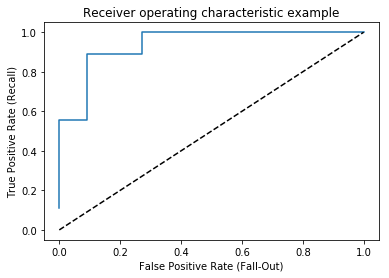

In [43]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

## AUC (Area Under the Curve)

ROC curve의 아래의 면적. 1에 가까울 수록 좋은 모델이다.

In [44]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.93939393939393945